<a href="https://colab.research.google.com/github/KPK101/MultiLingualTranslation/blob/main/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Reference Link](https://colab.research.google.com/github/apache/beam/blob/master/examples/notebooks/get-started/learn_beam_basics_by_doing.ipynb#scrollTo=30l8_MD-undP)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# import os
# os.chdir("/content/drive/MyDrive/Colab Notebooks/LSSP_code/project/MultiLingualTranslation")

Mounted at /content/drive


In [3]:
! pip install --quiet apache-beam
# ! pip install --quiet transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setu

In [4]:
!git clone https://github.com/KPK101/MultiLingualTranslation.git

Cloning into 'MultiLingualTranslation'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 61 (delta 22), reused 38 (delta 9), pack-reused 0
Receiving objects: 100% (61/61), 75.36 KiB | 2.28 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [5]:
# import os
# os.chdir('MultiLingualTranslation')
import sys
sys.path.append('/content/MultiLingualTranslation')


In [53]:
import apache_beam as beam
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

import logging
logging.root.setLevel(logging.ERROR)


from utils.evaluate import Evaluate

import matplotlib.pyplot as plt
import numpy as np
import re


In [7]:

input_file = './dataset.txt'

lines_to_write = [
    "In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery.",
    "Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space.",
    "Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers.",
    "Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time.",
    "Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance.",
    "Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space.",
    "Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos.",
    "In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devouring everything that dares to venture too close.",
    "But amidst the chaos and violence of the cosmos, there exists a rare beauty, a harmony that transcends the boundaries of time and space.",
    "Stars are born in fiery explosions of light and energy, their radiance illuminating the darkness of the void.",
    "And in their death, they scatter the building blocks of life, seeding the cosmos with the raw materials from which new worlds will one day arise.",
    "Throughout the ages, civilizations have gazed upon the stars with wonder and awe, seeking to unlock the secrets of the universe.",
    "And though the cosmos may seem vast and unknowable, it is also a place of boundless possibility, where the dreams of humanity can take flight and soar among the stars.",
    "In this vast celestial expanse, the wonders of the universe await discovery, beckoning explorers to journey beyond the confines of their world and into the unknown depths of space.",
    "From distant galaxies to the smallest subatomic particles, the cosmos is a playground of infinite diversity, offering endless opportunities for exploration and discovery.",
    "And as humanity ventures further into the cosmos, new mysteries and wonders await, challenging our understanding of the universe and our place within it.",
    "For in the grand tapestry of the cosmos, every star, planet, and galaxy has a story to tell, a history written in the language of physics and mathematics.",
    "And as we unravel these mysteries, we come to understand not only the nature of the universe, but also ourselves, and our place within the vastness of creation."
]

with open(input_file, 'w') as file:
    for line in lines_to_write:
        file.write(line + '\n')

    file.close()

# ! cat dataset.txt

In [9]:
# !cp /content/dataset.txt "/content/drive/My Drive/Colab Notebooks/outputs"

In [8]:
model_name = 'facebook/nllb-200-distilled-1.3B'

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/808 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.48G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

In [9]:
import time

# class llm_conversion():
#     def __init__(self, source, target):
#         self.source = source
#         self.target = target

#         self.llm_pipeline_forward = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=source, tgt_lang=target)
#         self.llm_pipeline_backward = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=target, tgt_lang=source)

#         self.input_stream = ""
#         self.output_stram = ""

#         self.conversion_time = []
#         self.input_size = []


#     def infer_forward(self, text):
#         self.input_stream = self.input_stream + text

#         start = time.time()
#         output = self.llm_pipeline_forward(text, max_length=1000)

#         self.conversion_time.append(time.time() - start)
#         self.input_size.append(len(text))

#         translated_text = output[0]['translation_text']

#         return translated_text


#     def infer_backward(self, text):
#         output = self.llm_pipeline_backward(text, max_length=1000)
#         translated_text = output[0]['translation_text']

#         self.output_stram = self.output_stram + text

#         return translated_text


#     def get(self):
#         print(self.input_stream)
#         print()
#         print(self.output_stram)

# source = "eng_Latn"
# target = "hin_Deva"

# obj = llm_conversion(source, target)


source = "eng_Latn"
target = "fra_Latn"

llm_pipeline_forward = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=source, tgt_lang=target)
llm_pipeline_backward = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=target, tgt_lang=source)

input_stream = ""
output_stream = ""

conversion_time = []
input_size = []


def infer_forward(text):
    global input_stream, conversion_time, input_size

    input_stream = input_stream + text

    start = time.time()
    output = llm_pipeline_forward(text, max_length=1000)

    conversion_time.append(time.time() - start)
    input_size.append(len(text))

    translated_text = output[0]['translation_text']

    return translated_text


def infer_backward(text):
    global output_stream

    output = llm_pipeline_backward(text, max_length=1000)
    translated_text = output[0]['translation_text']

    output_stream = output_stream + translated_text

    return translated_text


def get():
    print(input_stream)
    print()
    print(output_stream)


In [10]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Prepare the reference and candidate sentences
reference = [['this', 'is', 'a', 'test']]
candidate = ['this', 'is', 'a', 'test']

# Calculate the BLEU score
bleu_score = sentence_bleu(reference, candidate)
print("BLEU score:", bleu_score)

BLEU score: 1.0


In [11]:
def break_paragraph(paragraph, chunk_size):
    chunks = []
    start_index = 0
    lists = paragraph.split(' ')
    # print(lists)
    csize = len(lists)//chunk_size
    while(start_index+csize<len(lists)+csize):
        chunk = lists[start_index:start_index+csize]
        chunks.append(chunk)
        start_index += csize
    return chunks

def break_paragraph_by_length(paragraph, csize):
    chunks = []
    start_index = 0
    lists = paragraph.split(' ')
    # print(lists)
    # csize = len(lists)//chunk_size
    while(start_index+csize<len(lists)+csize):
        chunk = lists[start_index:start_index+csize]
        chunks.append(chunk)
        start_index += csize
    return chunks

def process_chunks(chunks):
    phrases = []
    for c in chunks:
        phrases.append(" ".join(c))
    return phrases

In [12]:
class translate():
  def __init__(self, source, target):
    self.source = source
    self.target = target
    self.pipeline = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=source, tgt_lang=target)

  def infer(self, text, max_length=1000):
    output = self.pipeline(text, max_length=max_length)
    translated_text = output[0]['translation_text']
    return translated_text

  def infer_back(self, text, max_length=1000):
    output = self.pipeline(text, max_length=max_length)
    translated_text_back = output[0]['translation_text']
    return translated_text_back

source = 'eng_Latn'

def make_life_easy(class_obj):
  time1 = time.perf_counter()
  print(f"Translated to '{class_obj.target}' Translation is '{class_obj.infer(text)}'")
  print(f"Inference time = {time.perf_counter() - time1}")
  print()

In [78]:
paragraph = ''
# read the input_file into "paragraph"
with open(input_file, 'r', encoding='utf-8') as file:
    paragraph = file.read()
paragraph = paragraph.replace('\n', ' ')
print(paragraph)

In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery. Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space. Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers. Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time. Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance. Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space. Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos. In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devouring everythi

In [79]:
# def break_paragraph_by_length(paragraph, csize):
#     chunks = []
#     start_index = 0
#     words = paragraph.split(' ')
#     num_words = len(words)  # Total number of words

#     while start_index < num_words:
#         # Create chunk from start_index to start_index+csize
#         chunk = words[start_index:start_index + csize]
#         chunks.append(chunk)
#         start_index += csize

#     return chunks

# Function to break paragraph by number of words
def break_paragraph_by_length(paragraph, csize):
    chunks = []
    start_index = 0
    words = paragraph.split(' ')
    while start_index + csize <= len(words):
        chunk = words[start_index:start_index + csize]
        chunks.append(" ".join(chunk))
        start_index += csize
    # Append any remaining words as a smaller chunk
    if start_index < len(words):
        chunks.append(" ".join(words[start_index:]))
    return chunks


def process_chunks(chunks):
    # Join words in each chunk to form phrases
    phrases = [" ".join(chunk) for chunk in chunks]
    return phrases

def break_paragraph_by_sentences(paragraph):
    # Use regular expression to split by sentence terminators
    sentences = re.split(r'[.!?,]', paragraph)
    return [sentence.strip() for sentence in sentences if sentence]

# def break_paragraph_by_delimiters(paragraph, delimiters, max_sentences=None):
#     # Create a regular expression pattern from the list of delimiters
#     # Join delimiters to form a regex pattern. Escape delimiters as needed.
#     pattern = '|'.join(re.escape(delimiter) for delimiter in delimiters)

#     # Split the paragraph using the compiled pattern
#     chunks = re.split(pattern, paragraph)

#     # Optionally group chunks to form larger segments based on max_sentences
#     if max_sentences:
#         grouped_chunks = []
#         sentence_count = 0
#         current_group = []

#         for chunk in chunks:
#             if sentence_count < max_sentences:
#                 current_group.append(chunk)
#                 sentence_count += 1
#             else:
#                 grouped_chunks.append(' '.join(current_group).strip())
#                 current_group = [chunk]
#                 sentence_count = 1

#         # Add the last group if any
#         if current_group:
#             grouped_chunks.append(' '.join(current_group).strip())
#         chunks = grouped_chunks

#     # Strip whitespace and filter out empty strings
#     return [chunk.strip() for chunk in chunks if chunk.strip()]

# Function to break by various delimiters
def break_paragraph_by_delimiters(paragraph, delimiters, max_sentences=None):
    pattern = '(?<=' + '|'.join(re.escape(delimiter) for delimiter in delimiters) + ')'
    chunks = re.split(pattern, paragraph)
    if max_sentences:
        grouped_chunks = []
        sentence_count = 0
        current_group = []
        for chunk in chunks:
            if sentence_count < max_sentences:
                current_group.append(chunk)
                if re.search('|'.join(re.escape(delimiter) for delimiter in delimiters), chunk):
                    sentence_count += 1
            else:
                grouped_chunks.append(' '.join(current_group).strip())
                current_group = [chunk]
                sentence_count = 1
        if current_group:
            grouped_chunks.append(' '.join(current_group).strip())
        chunks = grouped_chunks
    return [chunk.strip() for chunk in chunks if chunk.strip()]



# paragraph = 'This is a very long paragraph, detailing every account of what may or may not happen in life. Life as we know it, is not linear but rather karmic and cyclic.'
print(paragraph)
# chunk_sizes = [5, 10, 15, 20]
chunk_sizes = [5, 10, 20]
pr_par = []

# for chunk_size in chunk_sizes:
#     chunks = break_paragraph_by_length(paragraph, chunk_size)
#     processed_paragraph = process_chunks(chunks)
#     print(f"Chunks for size {chunk_size}: {processed_paragraph}")
#     pr_par.append(processed_paragraph)

# # Different delimiters and scenarios
# print("Chunks by commas, periods, etc.:", break_paragraph_by_delimiters(paragraph, [',', '.', ';', ':', '-']))
# print("Chunks by periods only (1 sentence each):", break_paragraph_by_delimiters(paragraph, ['.']))
# print("Chunks by 2 sentences each:", break_paragraph_by_delimiters(paragraph, ['.'], max_sentences=2))
# print("Chunks by newline (each line is a chunk):", break_paragraph_by_delimiters(paragraph, ['\n']))

# Process chunks by word-based sizes
for chunk_size in chunk_sizes:
    chunks = break_paragraph_by_length(paragraph, chunk_size)
    pr_par.append(chunks)

# Process chunks by different delimiter-based strategies
delimiter_strategies = [
    ('commas, periods, etc.', [',', '.', ';', ':', '-'])
    ,('periods only (1 sentence each)', ['.'])
    # ,('2 sentences each', ['.'], 2)
    # ,('newline', ['\n'])
]

for name, *args in delimiter_strategies:
    chunks = break_paragraph_by_delimiters(paragraph, *args)
    pr_par.append(chunks)

# Print results
for idx, chunks in enumerate(pr_par):
    print(f"Chunk set {idx + 1}: {chunks}")

In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery. Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space. Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers. Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time. Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance. Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space. Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos. In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devouring everythi

In [80]:
for pr in pr_par: print(len(pr))

83
42
21
55
18


In [13]:
# # paragraph = 'This is a very long paragraph, detailing every account of what may or may not happen in life. Life as we know it, is not linear but rather karmic and cyclic.'
# # paragraph = ''
# # # read the input_file into "paragraph"
# # with open(input_file, 'r', encoding='utf-8') as file:
# #     paragraph = file.read()
# # paragraph = paragraph.replace('\n', ' ')

# chunk_sizes = [5, 10, 15, 20]
# pr_par = []
# # loop through chunk sizes
# for chunk_size in chunk_sizes:
#     # break up chunks by number of words
#     chunks = break_paragraph_by_length(paragraph, chunk_size)
#     # print(chunks)
#     print(chunk_size)
#     # append all chunks to a list
#     processed_paragraph = process_chunks(chunks)
#     print(processed_paragraph)
#     # save chunked paragraph in larger list
#     pr_par.append(processed_paragraph)

5
['This is a very long', 'paragraph, detailing every account of', 'what may or may not', 'happen in life. Life as', 'we know it, is not', 'linear but rather karmic and', 'cyclic.']
10
['This is a very long paragraph, detailing every account of', 'what may or may not happen in life. Life as', 'we know it, is not linear but rather karmic and', 'cyclic.']
15
['This is a very long paragraph, detailing every account of what may or may not', 'happen in life. Life as we know it, is not linear but rather karmic and', 'cyclic.']
20
['This is a very long paragraph, detailing every account of what may or may not happen in life. Life as', 'we know it, is not linear but rather karmic and cyclic.']


In [62]:
# for idx,text in enumerate(pr_par[-1]):
#   print(text)
#   print(idx)
# len(pr_par[-1])

In [81]:
num_experiments = len(pr_par)
# smoothing function for BLEU score calculation
smoothie = SmoothingFunction().method4
# prepare reference text for BLEU score calculation
ref = [paragraph.split()]
# print reference text
print(' '.join(ref[0]))
# prepare translation
test = translate(source, target)

bleu_scores = []
total_inf_times = []
avg_inf_times = []
nums_chunks = np.zeros(num_experiments)

# loop through chunk sizes
for exp_num,pr in enumerate(pr_par):
  # print(f'chunk size {chunk_sizes[exp_num]}')
  num_chunks = len(pr)
  nums_chunks[exp_num] = num_chunks
  text_back = []

  # initialize times for avg
  inf_times_for_avg = np.zeros(num_chunks)
  # start timer for total inf time
  time1 = time.perf_counter()
  # loop through chunks
  for chunk_num,text in enumerate(pr):
    # start timer for average inf time
    time2 = time.perf_counter()
    # print(text)
    translated_text = test.infer(text)
    inf_times_for_avg[chunk_num] = time.perf_counter() - time2
    # print(translated_text)
    test_back = translate(target, source)
    translated_text_back = test_back.infer_back(translated_text)
    # print(translated_text_back)
    text_back.append(translated_text_back)

  print(f'num chunks? {num_chunks}')
  avg_inf_times.append(inf_times_for_avg.mean())
  print(f'avg inf time {inf_times_for_avg.mean()}')
  print(inf_times_for_avg.mean()*num_chunks)
  # store total inference time
  total_inf_time = time.perf_counter() - time1
  total_inf_times.append(total_inf_time)
  # print inference time
  print("Time:", total_inf_time)

  # prepare translation for BLEU score
  hyp = ' '.join(text_back).split()
  print(' '.join(text_back))
  # calculate BLEU score using the smoothing function
  bleu_score = sentence_bleu(ref, hyp, smoothing_function=smoothie)
  bleu_scores.append(bleu_score)

  # print the BLEU score
  print("BLEU score:", bleu_score)
  print('')

In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery. Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space. Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers. Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time. Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance. Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space. Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos. In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devouring everythi

In [48]:
avg_inf_times

[6.163763561428693, 7.154784842000026, 8.340546269333572, 11.81038511550014]

In [41]:
inf_times_for_avg = np.zeros(len(pr))
inf_times_for_avg[0] = 1
inf_times_for_avg[1] = 2
inf_times_for_avg.mean()

1.5

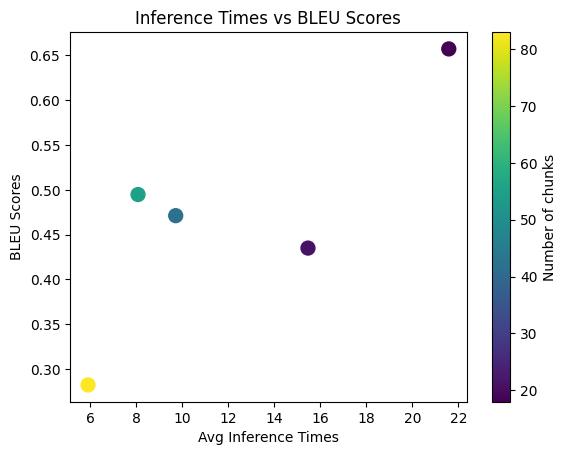

In [82]:
# # Compute average translation time based on chunk sizes (wrong calc!)
# result = [inf_time / chunk_size for inf_time, chunk_size in zip(inf_times, chunk_sizes)]

# Create the scatter plot using plt.scatter
scatter = plt.scatter(avg_inf_times, bleu_scores, c=nums_chunks, cmap='viridis', s=100)

# Add a colorbar to show the mapping from chunk sizes to color
cbar = plt.colorbar(scatter)
cbar.set_label('Number of chunks')

# Add axis labels and title
plt.xlabel('Avg Inference Times')
plt.ylabel('BLEU Scores')
plt.title('Inference Times vs BLEU Scores')

# Display the plot
plt.show()

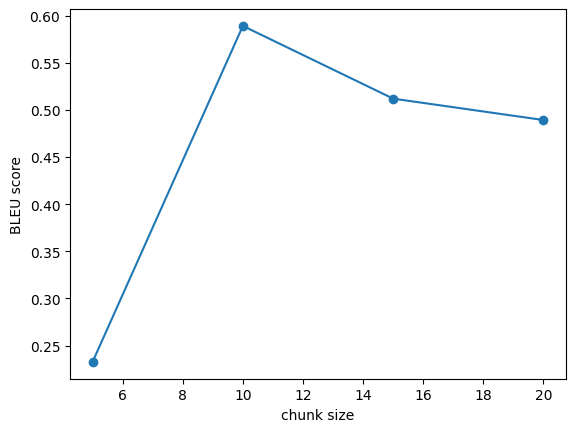

In [24]:
# import matplotlib.pyplot as plt
plt.plot(chunk_sizes, bleu_scores, marker='o')
plt.xlabel('chunk size')
plt.ylabel('BLEU score')
plt.show()

In [74]:
# print(pr_par[-1])
# paragraph.split()
# # print(spl)

In [73]:
# text_joined = ' '.join(pr_par[-1])
# text_back_joined = ' '.join(text_back)
# print(text_joined)
# print(text_back_joined)

# Original text and back-translated text split into words
ref = [paragraph.split()]  # Note the double list for a single reference
hyp = ' '.join(text_back).split()

# Print out the tokenized sentences to verify
# print("Reference:", ref)
# print("Hypothesis:", hyp)
# Choose a smoothing function
smoothie = SmoothingFunction().method4

# Calculate BLEU score using the smoothing function
bleu_score = sentence_bleu(ref, hyp, smoothing_function=smoothie)

# Print the BLEU score
print("BLEU score:", bleu_score)

# bleu_score = sentence_bleu(text_joined, text_back_joined)
# print("BLEU score:", bleu_score)

Reference: [['This', 'is', 'a', 'very', 'long', 'paragraph,', 'detailing', 'every', 'account', 'of', 'what', 'may', 'or', 'may', 'not', 'happen', 'in', 'life.', 'Life', 'as', 'we', 'know', 'it,', 'is', 'not', 'linear', 'but', 'rather', 'karmic', 'and', 'cyclic.']]
Hypothesis: ["It's", 'a', 'very', 'long', 'paragraph,', 'detailing', 'every', 'story', 'of', 'what', 'may', 'or', 'may', 'not', 'happen', 'in', 'life.', 'We', 'know', "it's", 'not', 'linear,', 'but', 'rather', 'karmic', 'and', 'cyclical.']
BLEU score: 0.48933766303344434


In [ ]:
def translate_text(target: str, text: str) -> dict:
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, bytes):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    print("Text: {}".format(result["input"]))
    print("Translation: {}".format(result["translatedText"]))
    print("Detected source language: {}".format(result["detectedSourceLanguage"]))

    return result


translate_text('hi', 'this is a random')

In [9]:
beam_pipeline = beam.Pipeline()

output_file_name = "output"

outputs = (
    beam_pipeline
      | 'read the dataset' >> beam.io.ReadFromText(input_file)
      | 'forward translation' >> beam.Map(infer_forward)
      | 'backward translation' >> beam.Map(infer_backward)
      | 'write results 2' >> beam.io.WriteToText(output_file_name, file_name_suffix = ".txt")
      | 'print the text file name' >> beam.Map(print)
)

beam_pipeline.run()

output-00000-of-00001.txt


In [21]:
# !pwd
# !ls -l
!cp /content/output-00000-of-00001.txt "/content/drive/My Drive/Colab Notebooks/outputs"

In [18]:
input_stream
# ! cat MultiLingualTranslation
# import os
# os.chdir('..')
# !pwd
# !ls -l

# !cp /content/dataset.txt "/content/drive/My Drive/Colab Notebooks/outputs"

# !ls "/content/drive/My Drive/Colab Notebooks/outputs"

"In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery.Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space.Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers.Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time.Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance.Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space.Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos.In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devouring everything tha

In [19]:
output_stream

"In the vast expanse of the universe, among countless stars and galaxies that stretch beyond the limits of imagination, there exists a tapestry of wonder and mystery.Within this cosmic blanket, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns on the velvet canvas of space.The blobs are surrounded by colors not seen on Earth, their abstract beauty catching the eye of distant observers.The planets, each a world unto themselves, orbit their parent stars in a delicate ballet of speed and time.The moon, silent watchman in the night sky, silently watches over its planetary companion with vigilance.Comets orbit in the dark, traveling through the cold depths of space, leaving behind traces of stellar dust.Asteroids, remnants of ancient collisions, flow silently through the void, silent witnesses to the turbulent history of the universe.Deep in the universe, black holes lurk like space predators, their gravity force eating away at anything that dares to get 

In [22]:
get()

metric = Evaluate()

print(metric.jaccard_similarity(input_stream, output_stream))
print(metric.cosine_similarity(input_stream, output_stream))
print(metric.eucledian_distance(input_stream, output_stream))

In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery.Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space.Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers.Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time.Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance.Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space.Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos.In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devouring everything that

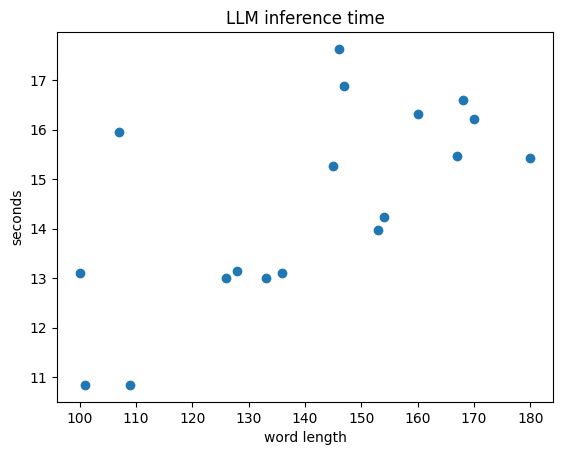

In [23]:
import matplotlib.pyplot as plt

plt.scatter(input_size, conversion_time, marker='o')

plt.xlabel('word length')
plt.ylabel('seconds')
plt.title('LLM inference time')

plt.show()

In [24]:
print("original text")
! cat dataset.txt

print("\n\n\n")
print("translated text")
! cat output-00000-of-00001.txt

original text
In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery.
Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space.
Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers.
Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time.
Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance.
Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space.
Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos.
In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devo

In [16]:
! ls
! pwd

beam-temp-output-3516f8e80a7d11ef830b0242ac1c000c  drive		      sample_data
beam-temp-output-6248657a0a7f11ef830b0242ac1c000c  MultiLingualTranslation
dataset.txt					   output-00000-of-00001.txt
/content
